<a href="https://colab.research.google.com/github/DButmeh/-Sales-Prediction-Project/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **"Preparing for Machine Learning"**
## Prediction of Product Sales |feature inspection
###Dina Al Botmeh

--------
-----


In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import numpy and pandas
import numpy as np
import pandas as pd

##1) What data have we been provided?

In [ ]:
# Read in the data with Pandas
fpath = "/content/drive/MyDrive/CodingDojo/ project sales predictions/sales_predictions_2023.csv"
df=pd.read_csv(fpath)
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# What information is included in the data?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#How many features (columns)? How many records (rows)?
-The file had 8523 rows and 12 columns.

#What is each feature's format/data type (string/integer/etc.)?
 - There was a mixture of datatypes:
  - 4 float
  - 1 int
  - 7 object



# Are there duplicates? If so, drop any duplicates.
  - No duplications

In [ ]:
df.duplicated().sum()

0

In [ ]:
null_sums=df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Find and fix any inconsistent categories

######Check each string column's value counts for inconsistent values

In [ ]:
#select object columns
col_ob=df.select_dtypes("object").columns
col_ob

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#for loop to Check each string column
for col in col_ob:
  print(f"value counts for {col}")
  print(df[col].value_counts())
  print("\n")

value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [ ]:
# Standardize the values in "Item_Fat_Content" column
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"Low Fat":"LF",
                                                       "Regular":"Reg",
                                                       "low fat":"LF",
                                                       "reg":"Reg"})
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
LF     5517
Reg    3006
Name: count, dtype: int64

####8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
# Obtain summary statistics for numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Name the file
fpath_out = "/content/drive/MyDrive/CodingDojo/ project sales predictions/sales_predictions_2023ml.csv"
df.to_csv(fpath_out, index=False)


In [ ]:
# Read in the data with Pandas
load = "/content/drive/MyDrive/CodingDojo/ project sales predictions/sales_predictions_2023ml.csv"
dfc=pd.read_csv(load)
# Display the first 5 rows
dfc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
dfc.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Univariate EDA Functions

In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df,x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order,hue=x)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y,hue=x, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold');
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

###The target:**Item_Outlet_Sales**
 - Features : Item_Identifier , Item_Weight , Item_Fat_Content ,  Item_Visibility , Item_Type , Item_MRP,Outlet_Identifier , Outlet_Establishment_Year , Outlet_Size , Outlet_Location_Type , Outlet_Type

#Inspecting:**Item_Identifier**
### Item_Identifier:Product ID
#### 1559 Item_ Identifier like index no need to inspection
-----------------------------
---------------------------

#Inspecting:**Item_Weight**
### Item_Weight:Weight of product


#1)**Item_Weight** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

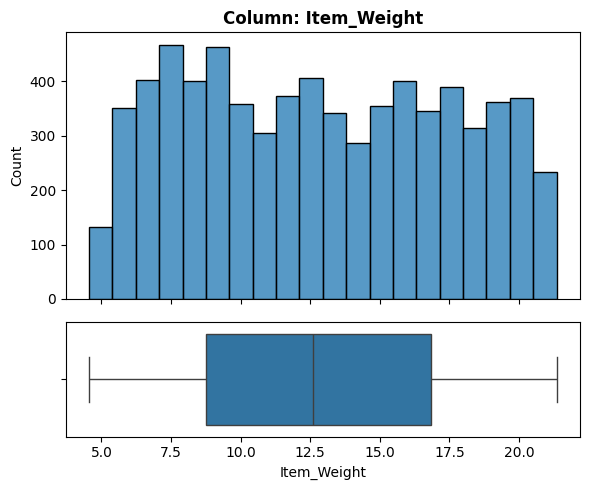

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [ ]:
# Calling custom EDA function for numeric
explore_numeric(df,feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%)
  - Since the missing values at Item_Weight are part or  could be sorted by Item_Type,as general classification

In [ ]:
#checking null
null_Weight=df["Item_Weight"].isna()
check_Weight=df.loc[null_Weight]
check_Weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Reg,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,LF,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,LF,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,LF,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Reg,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
#looking if Item_Type could be use to fined a placeholde
weight=df.groupby("Item_Type")["Item_Weight"].describe()
weight

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


  - **impute** the null : by comparing with same **Item_type** using the **mean** or **median** as placholder  

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - no
5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes,the rang of the weight almost with same  describe  according to Item_Type which represent the general aspect for item weight

#3)Item_Weight Multivariate Viz

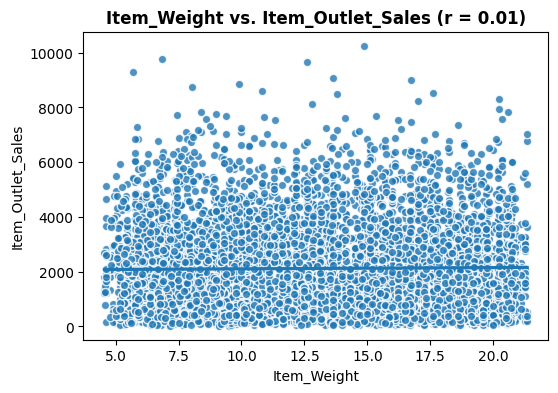

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,feature,figsize=(6,4))

#4) Feature vs. Target Observations
 - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, all item with same averge
 - Does this feature appear to be a predictor of the target?
    - No, there is no correlation between the Item_Weight and Item_Outlet_Sales (r=-0.01).
----------------------------------------
------------------


#Inspecting:**Item_Fat_Content**
### Item_Fat_Content :Whether the product is low-fat or regular


#1)**Item_Fat_Content** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Item_Fat_Content"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


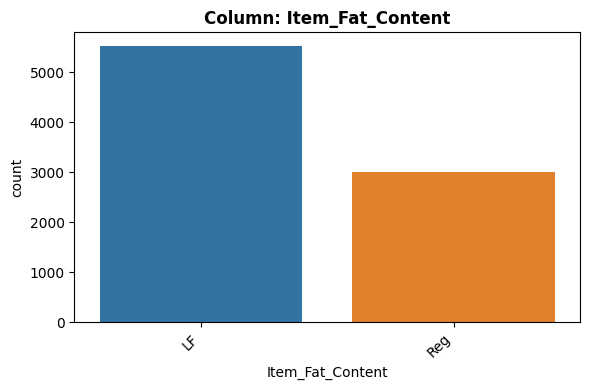

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'LF' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs 5517 times (64.73%)of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - There are 2 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.Because these are very important categorisation for the Item and the demand for LF is almost double the Reg

#3) **Item_Fat_Content** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

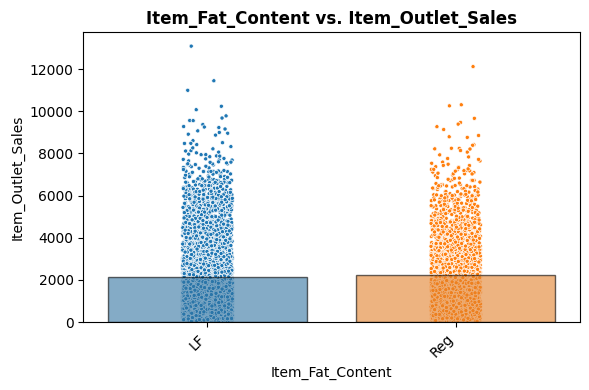

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature)

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,  the high demand built the balance between both Item .
  - Does this feature appear to be a predictor of the target?
   - Yes,each type has an important role that impact the sales.high demand is one of the basic sales strategy.
------------------------
--------


#Inspecting:**Item_Visibility**
###  Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product


#1)**Item_Visibility** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Item_Visibility"
df[feature].dtypes

dtype('float64')

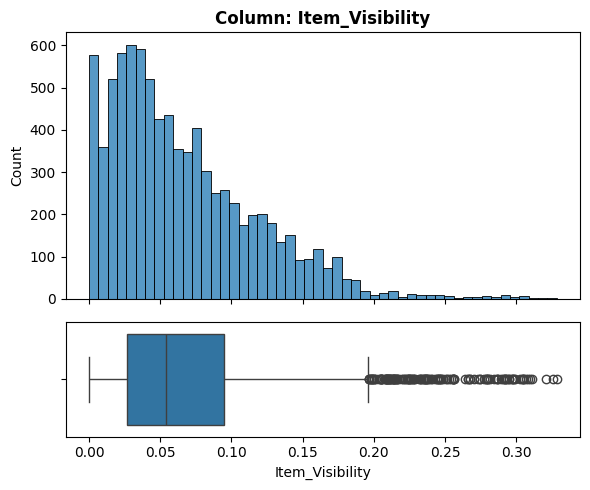

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [ ]:
# Calling custom EDA function for numeric
explore_numeric(df,feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs 526 times (6.17%)of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - the feature is tricky  the size of an   Item  may playing a rowe, but also.Display area of  an item is an important part of the marketing sales process.

#3) **Item_Visibility** Multivariate Viz

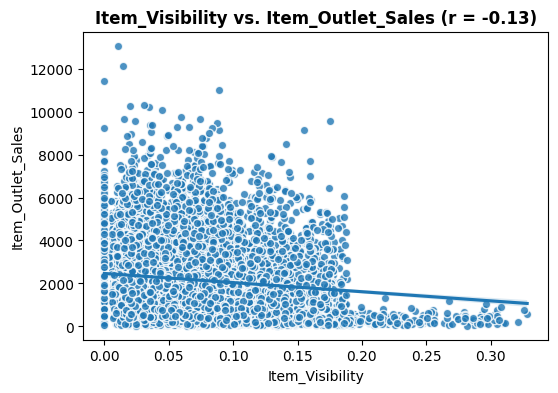

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,feature,figsize=(6,4))

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,more displaying may increase the sales but distributing the display area may decrease the sales
  - Does this feature appear to be a predictor of the target?
   - Yes,there is  negative correlation between the Item_Visibility and Item_Outlet_Sales (r=-0.13),distributing the display area may decrease the sales .
-----------------------


#Inspecting:**Item_Type**
### Item_Type :The category to which the product belongs
- Fruits and Vegetables, Snack Foods , Household , Frozen ,Foods ,  Dairy , Canned ,Baking Goods ,Health and Hygiene ,Soft Drinks ,Meat,Breads,Hard Drinks,Others ,Starchy Foods,Breakfast ,Seafood











#1)**Item_Type** Univariate Viz

In [ ]:
df['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Item_Type"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


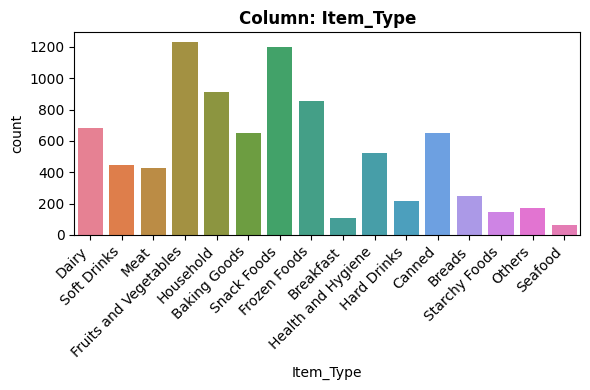

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  -Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value only 'Fruits and Vegetables' occurs 1232 times (14.46%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - High,16 categories.
  - This feature may be problematic for modeling due to high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - these are  the base of analysis for the categorisation  of Itemes sales

#3) **Item_type** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

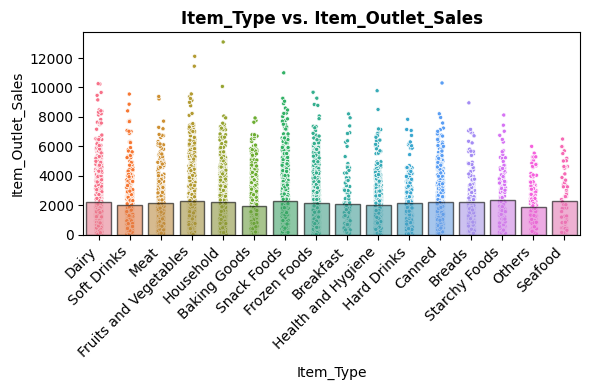

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature)

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, Item type is the qualitative analysis part
  - Does this feature appear to be a predictor of the target?
   - Yes,Item type is the definition that shows the item out sales .
-----------------------


#Inspecting:**Item_MRP**
###  Item_MRP:Maximum Retail Price (list price) of the product

#1)**Item_MRP** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Item_MRP"
df[feature].dtypes

dtype('float64')

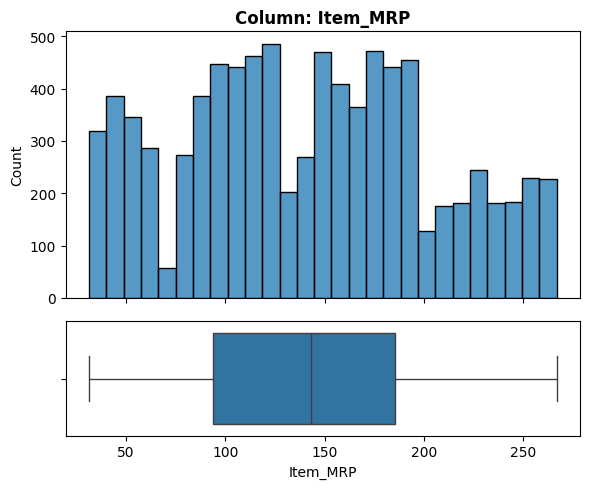

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [ ]:
# Calling custom EDA function for numeric
explore_numeric(df,feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value occurs 7 times (0.08%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  -  list price is key for the quantitative analysis for Item and the miror for item out sales

#3) **Item_MRP** Multivariate Viz

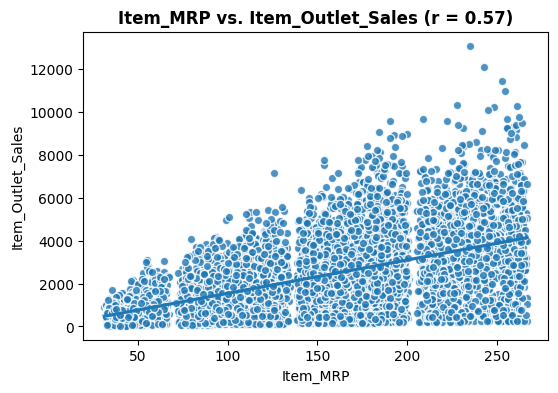

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,feature,figsize=(6,4))

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,Retail Price is  the core element of any items sales analysis
  - Does this feature appear to be a predictor of the target?
   - Yes,there is a positive correlation between the Item_MRP and Item_Outlet_Sales (r=0.57) .
-----------------------


#Inspecting:**Outlet_Identifier**
### Outlet_Identifier :Store ID
- OUT027--OUT013--OUT049--OUT046--OUT035--OUT045--OUT018--OUT017--OUT010--OUT019


In [ ]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

#1)**Outlet_Identifier** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Outlet_Identifier"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


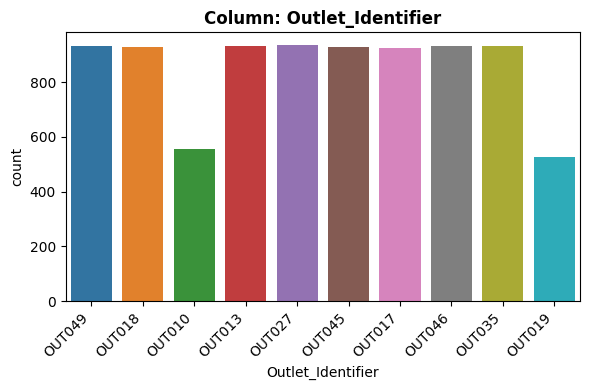

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value 'OUT027' occurs 935 times (10.97%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - 10 unique values. This is equal 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes. most of the counts are in the same range except of two.so need to explor more .

#3) **Outlet_Identifier** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


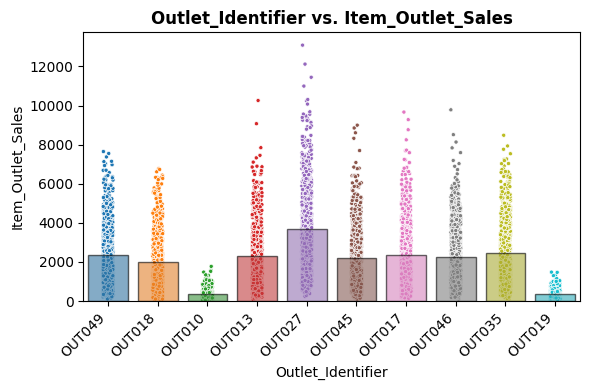

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature);

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No,the highest and lowest avareg is interesting to explor more and maybe to chek outlet .
  - Does this feature appear to be a predictor of the target?
   - Yes,the difference of the distributions between stores should be considered.
-----------------------


#Inspecting:**Outlet_Establishment_Year**
###  Outlet_Establishment_Year:The year in which store was established

#1)**Outlet_Establishment_Year** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Outlet_Establishment_Year"
df[feature].dtypes

dtype('int64')

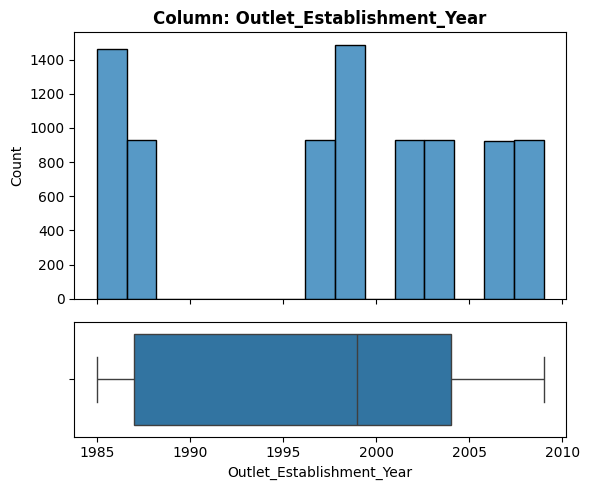

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# Calling custom EDA function for numeric
explore_numeric(df,feature, figsize=(6,5) );

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value only'1985' occurs 1463 times (17.17%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - No

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

#3) **Outlet_Establishment_Year** Multivariate Viz

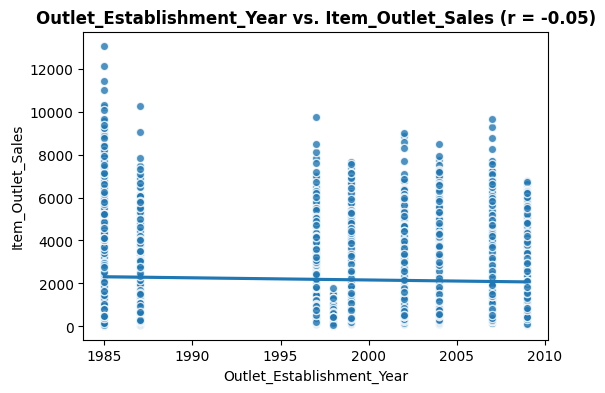

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df,feature,figsize=(6,4))

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,It shows the establish  Year for each store, with  consider  that for years the shope built the trust of customer and that an important aspect
  - Does this feature appear to be a predictor of the target?
   - Yes,there is low  negative correlation between the Outlet_Establishment_Year and Item_Outlet_Sales (r=-0.05)
-----------------------


#Inspecting:**Outlet_Size**
### Outlet_Size :The size of the store in terms of ground area covered
- Medium   
- Small    
- High

In [ ]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

#1)**Outlet_Size** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Outlet_Size"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


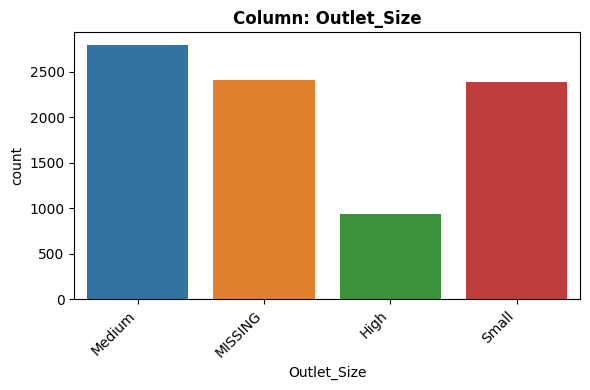

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - NaN's Found: 2410 (28.28%)
  



In [ ]:
#chicking the null value
nul_size=df["Outlet_Size"].isna()
df[nul_size].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Reg,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Reg,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Reg,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [ ]:
# to be able to comper
df[["Outlet_Size","Outlet_Identifier","Outlet_Type"]].value_counts()

Outlet_Size  Outlet_Identifier  Outlet_Type      
Medium       OUT027             Supermarket Type3    935
High         OUT013             Supermarket Type1    932
Medium       OUT049             Supermarket Type1    930
Small        OUT035             Supermarket Type1    930
             OUT046             Supermarket Type1    930
Medium       OUT018             Supermarket Type2    928
Small        OUT019             Grocery Store        528
Name: count, dtype: int64

- impute = small,the null value exist only at one store that we could compare with another shope from same criteria using Outlet Type,

3. Is the feature constant or quasi-constant?
  - No, the most common value 'Medium' occurs 2793 times (32.77%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - 3 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes ,related more to  story which efect  Item_outsale with could con

#3) **Item_Fat_Content** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


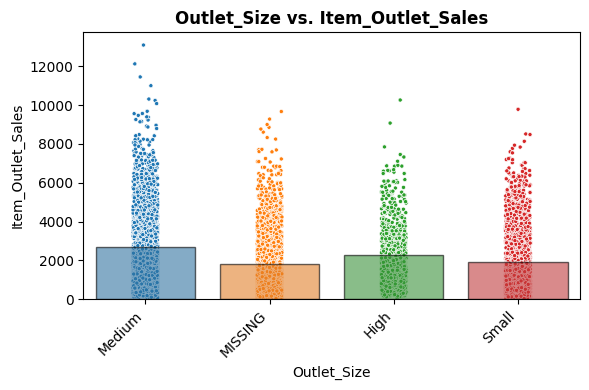

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature);

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, an indecater for the outlet "store" better store better sales .
  - Does this feature appear to be a predictor of the target?
   -Yes
-----------------------
-----------------------


#Inspecting:Outlet_Location_Type
##Outlet_Location_Type:The type of area in which the store is located
- Tier 3    
- Tier 2   
- Tier 1

#1)**Outlet_Location_Type** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Outlet_Location_Type"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


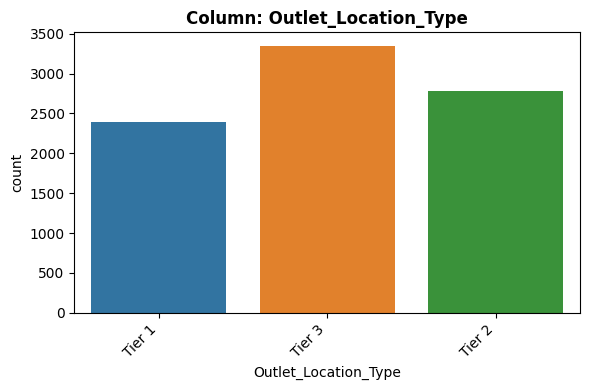

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


In [ ]:
# to be able to comper
df[["Outlet_Size","Outlet_Identifier","Outlet_Type","Outlet_Location_Type"]].value_counts()

Outlet_Size  Outlet_Identifier  Outlet_Type        Outlet_Location_Type
Medium       OUT027             Supermarket Type3  Tier 3                  935
High         OUT013             Supermarket Type1  Tier 3                  932
Medium       OUT049             Supermarket Type1  Tier 1                  930
Small        OUT035             Supermarket Type1  Tier 2                  930
             OUT046             Supermarket Type1  Tier 1                  930
Medium       OUT018             Supermarket Type2  Tier 3                  928
Small        OUT019             Grocery Store      Tier 1                  528
Name: count, dtype: int64

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value 'Tier 3' occurs 3350 times (39.31%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - 3 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes. the stor area verey importent and we could see that Tier 3 is with the highest count .

#3) **Outlet_Identifier** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


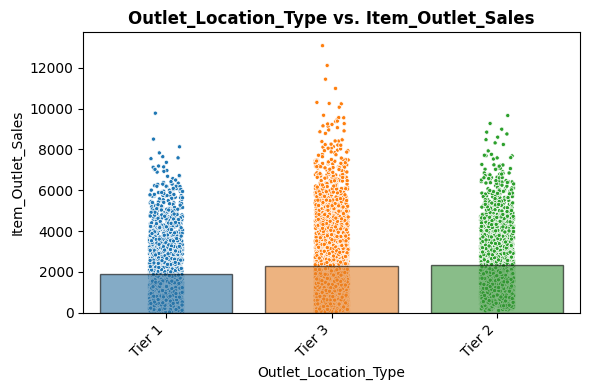

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature);

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,the highest and lowest avareg is interesting to explor more and maybe to chek outlet .
  - Does this feature appear to be a predictor of the target?
   - Yes,the difference of the distributions between stores  according to  their location should be considered.
-----------------------
-------------------


#Inspecting:Outlet_Type
##Outlet_Type:Whether the outlet is a grocery store or some sort of supermarket
- Supermarket Type3,Supermarket Type2 , Supermarket Type1, Grocery Store

#1)**Outlet_Type** Univariate Viz

In [ ]:
# # Confirming the dtype to select correct EDA function
feature ="Outlet_Type"
df[feature].dtypes

dtype('O')

<ipython-input-350-a36feb576344>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


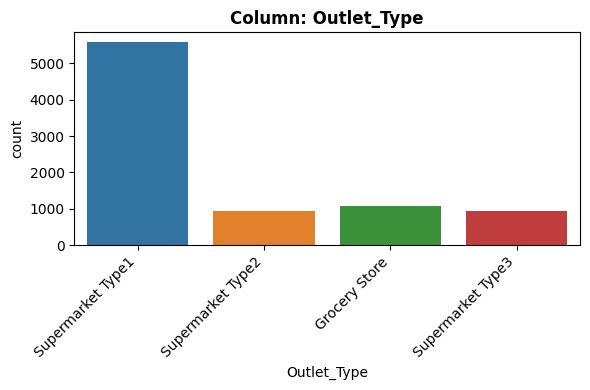

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [ ]:
# Calling our custom EDA function
explore_categorical(df,feature,)


In [ ]:
# to be able to comper
df[["Outlet_Size","Outlet_Identifier","Outlet_Type","Outlet_Location_Type"]].value_counts()

Outlet_Size  Outlet_Identifier  Outlet_Type        Outlet_Location_Type
Medium       OUT027             Supermarket Type3  Tier 3                  935
High         OUT013             Supermarket Type1  Tier 3                  932
Medium       OUT049             Supermarket Type1  Tier 1                  930
Small        OUT035             Supermarket Type1  Tier 2                  930
             OUT046             Supermarket Type1  Tier 1                  930
Medium       OUT018             Supermarket Type2  Tier 3                  928
Small        OUT019             Grocery Store      Tier 1                  528
Name: count, dtype: int64

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  NaN's Found: 0 (0.0%)
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common value 'Tier 3' occurs 3350 times (39.31%). The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - 3 unique values. This is less than 10, which is our threshold for high cardinality.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - no.

#3) **Outlet_Identifier** Multivariate Viz

<ipython-input-351-711ee6095336>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


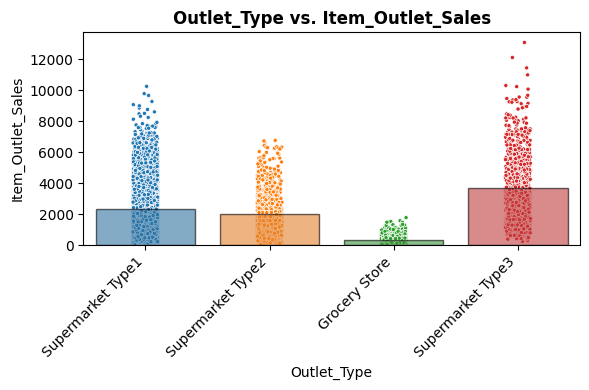

In [ ]:
# Run the appropriate feature vs. target function  Call custom function
plot_categorical_vs_target(df,feature);

#4) Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,the conclusion for story Features (the groupby for all the columns )that related to outlet store
  - Does this feature appear to be a predictor of the target?
   - Yes.The criteria of the store would affect the Item_outlet_sales amount
-----------------------
-------------------
---------------------
